Quickstart 
===================================
Some intro stuff



We shall first show how easy it is to get a feature visualisation going using visual. 

In [0]:
!pip install -q torchbearer-visual

We import a couple things from visual and then print the layer names of squeezenet v1.1 so that we can decide which layer to ascend on. 

In [24]:
from visual.models import squeezenet1_1
from visual import BasicAscent, Channel, image
from visual.transforms import RandomRotate, RandomScale, SpatialJitter, Compose

model = squeezenet1_1(True, False)
print(model.get_layer_names())

['conv1', 'relu1', 'maxpool2', 'fire2a', 'fire2b', 'maxpool3', 'fire3a', 'fire3b', 'maxpool4', 'fire4a', 'fire4b', 'fire4c', 'fire4d', 'dropout4', 'final_conv', 'relu4', 'avgpool']


Let's choose the final layer, where we have 1000 channels, each corresponding to 1 imagenet class. We'll choose the 256th feature, which is the class "Newfoundland Dog". After running a `BasicAscent` and viewing it in pyplot, you can confirm for yourself that we indeed see things that look like dogs. 

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2539: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


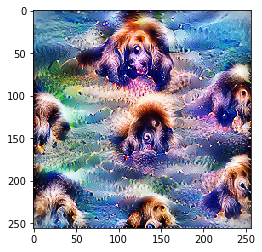

In [28]:
transforms = Compose([
    RandomRotate(list(range(-30, 30, 5))),
    RandomScale([0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2]),
])

crit = Channel(256, 'avgpool')
img = image((3, 256, 256), transform=transforms, correlate=True, fft=True)


a = BasicAscent(img, crit, verbose=2).to_pyplot().run(model, device='cuda')

So, we have seen how quick it is to get a simple visualisation running, but what were did we actually do to get there? 

We'll now introduce, one at a time, the abstractions that visual uses:
- Images
- Transforms
- Criterions
- Ascenders
- Models
